# Problem 3

In [ ]:
%cd 'drive/MyDrive/DIP/'

/content/drive/MyDrive/DIP


In [1]:
!pwd

/content


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import skimage.metrics

In [ ]:
## read and take a look to images here ##




# Remove noise by DFT

In [ ]:
# define functions #
def dft(image):
    return np.fft.fft2(image)

def shift_fft(dft):
    return np.fft.fftshift(dft)

def reverse_shift(shifted_image):
    return np.fft.ifftshift(shifted_image)
    
def idft(image):
    return np.fft.ifft2(image)

In [ ]:
from google.colab.patches import cv2_imshow

682 512
MSE :  146.7847810896261
PSNR :  26.463993313874905
SSIM :  0.8938161900999154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

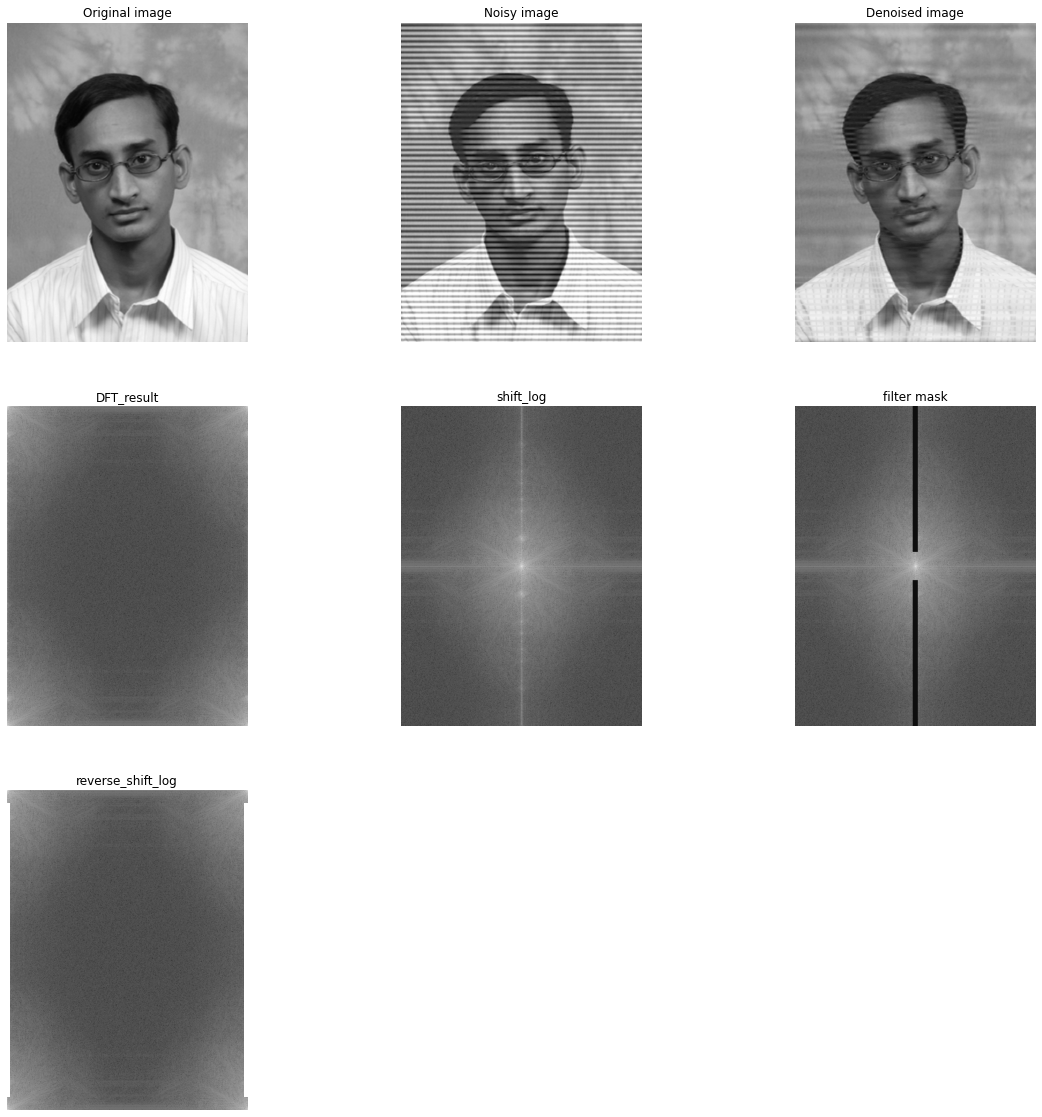

In [ ]:
# Number 2 problem series #
# enhance image #

image = cv2.imread("NoisyImg.png" , cv2.IMREAD_GRAYSCALE)
dft_result = dft(image)
# since we can not show complex numbers in original shape:
# to be able show the each level result we have to calculate the norm of each complex value so we use abs and log function
dft_log = np.log(np.abs(dft_result))
dft_shifted = shift_fft(dft_result)
shift_log = np.log(np.abs(dft_shifted))

# make my filter and apply to noisy image
height = shift_log.shape[0]
width = shift_log.shape[1]
print(height,width)


# my approach

filter = np.full((height , width) , 1)
filter[0:311,250:261] = 0
filter[371:,250:261] = 0


mask = filter * shift_log

for i in range(height):
    for j in range(width):
        dft_shifted[i][j] = dft_shifted[i][j] * filter[i][j]

# print(dft_shifted)
reverse_shifted = reverse_shift(dft_shifted)
reverse_shifte_log = np.log(np.abs(reverse_shifted))

#log0 = inf => creates white parts

denoised_image = idft(reverse_shifted)
# to show properly we should turn values unsigned and in range of 0-255 mapping and also show the norm because it is complex value
img_back = np.abs(denoised_image).clip(0,255).astype(np.uint8)

# evaluate by criteries #
real = cv2.imread("NoNoise.png" , cv2.IMREAD_GRAYSCALE)
mse = skimage.metrics.mean_squared_error(real , img_back)
print("MSE : " , mse)
psnr = skimage.metrics.peak_signal_noise_ratio(real , img_back)
print("PSNR : " , psnr)
ssim = skimage.metrics.structural_similarity(real , img_back)
print("SSIM : " , ssim)

cv2.imwrite('Denoised.jpg' , img_back)


# show per step result #
plt.gray()
fig = plt.figure(figsize = (20,20))
cols = 3
rows = 3
fig.add_subplot(rows , cols , 1)
plt.imshow(real)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(image)
plt.axis('off')
plt.title("Noisy image")

fig.add_subplot(rows , cols , 3)
plt.imshow(img_back)
plt.axis('off')
plt.title("Denoised image")

fig.add_subplot(rows , cols , 4)
plt.imshow((dft_log))
plt.axis('off')
plt.title("DFT_result")

fig.add_subplot(rows , cols , 5)
plt.imshow(shift_log)
plt.axis('off')
plt.title("shift_log")

fig.add_subplot(rows , cols , 6)
plt.imshow(mask)
plt.axis('off')
plt.title("filter mask")

fig.add_subplot(rows , cols , 7)
plt.imshow(reverse_shifte_log)
plt.axis('off')
plt.title("reverse_shift_log")

plt.show()

# Remove Noise by DCT

In [ ]:
from scipy.fftpack import dct, idct
from skimage.io import imread
from skimage.color import rgb2gray

In [ ]:
# define functions #
# implement 2D DCT via 1D DCT in this library
def dct_transform(image):
    # T transposes my array to calculate dct in both dimensions
    return dct(dct(image.T , type = 2, norm='ortho').T , type = 2 , norm='ortho')

# implement 2D IDCT
def idct_transform(image):
    return idct(idct(image.T , type = 2 , norm='ortho').T , type = 2 , norm='ortho')  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  # This is added back by InteractiveShellApp.init_path()


MSE :  0.002289679783625252
PSNR :  26.40225250380025
SSIM :  0.9444157978166695


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


<Figure size 432x288 with 0 Axes>

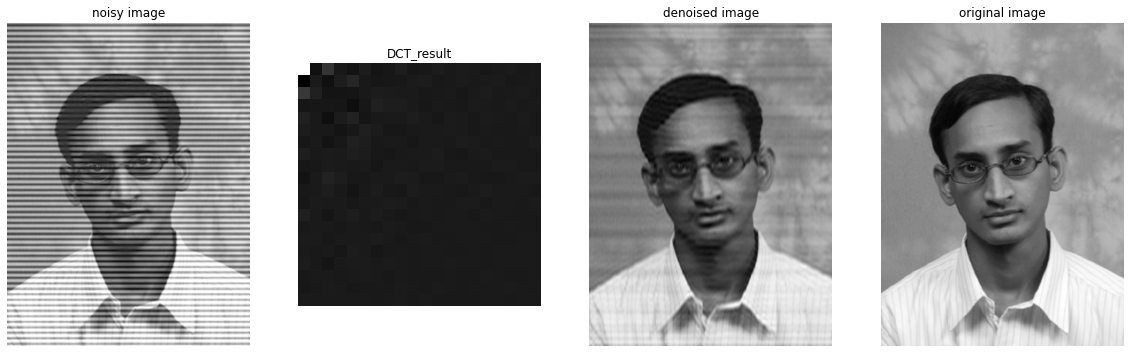

In [ ]:
# enhance  image # 
# read RGB image and convert to grayscale in this library
my_image = rgb2gray(imread('NoisyImg.png')) 
imF = dct_transform(my_image)
# becuase the whole dct was not clear I sliced it and represent the result or we can show log of magnitude
# DCT = np.log(np.absolute(imF))

DCT = imF[0:20 , 0:20]


# remove noise by filtering in high spectural pixels. this is DCT feature enjoy it!
filter = np.full((imF.shape[0] , imF.shape[1]) , 1)

# I just preserved almost 1/8 of whole
filter[100: , :] = 0


for i in range(len(imF)):
    for j in range(len(imF[0])):
      imF[i][j] = imF[i][j] * filter[i][j]

enhanced_image = idct_transform(imF)

# evaluate by criteries #
real = rgb2gray(imread('NoNoise.png')) 
mse = skimage.metrics.mean_squared_error(real , enhanced_image)
print("MSE : " , mse)
psnr = skimage.metrics.peak_signal_noise_ratio(real , enhanced_image)
print("PSNR : " , psnr)
ssim = skimage.metrics.structural_similarity(real , enhanced_image)
print("SSIM : " , ssim)

# plot original and reconstructed images and dct result with matplotlib
plt.gray()
fig = plt.figure(figsize = (20,20))
cols = 4
rows = 1
fig.add_subplot(rows , cols , 1)
plt.imshow(my_image)
plt.axis('off')
plt.title("noisy image")
fig.add_subplot(rows , cols , 2)
plt.imshow(DCT)
plt.axis('off')
plt.title("DCT_result")
fig.add_subplot(rows , cols , 3)
plt.imshow(enhanced_image)
plt.axis('off')
plt.title("denoised image")
fig.add_subplot(rows , cols , 4)
plt.imshow(real)
plt.axis('off')
plt.title("original image")
plt.show()